## Data Augmentation To Address Overfitting In Flower Classification CNN


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import PIL
import os
import tensorflow as tf 
from tensorflow import keras 

## Load flowers dataset

In [2]:
data = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [3]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=data,  cache_dir='.', untar=True)


In [4]:
data_dir 


'.\\datasets\\flower_photos'

### Path

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:9]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg')]

## Visulaization

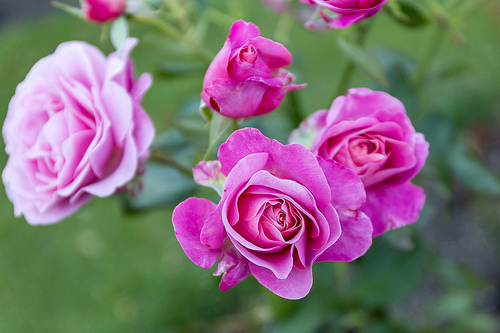

In [8]:
PIL.Image.open(roses[9])

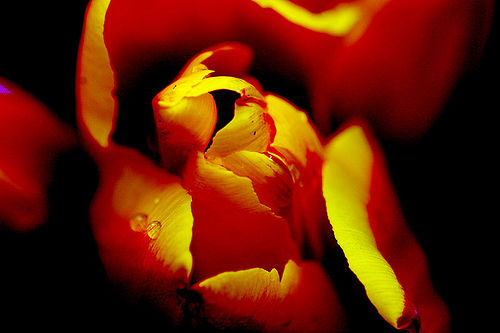

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[8])

### Read flowers images from disk into numpy array using opencv


In [10]:
flower_dict = {
    'roses' : list(data_dir.glob('tulips/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*'))

}

In [11]:
flower_labels_dict = {
    'roses':0,
    'tulips':1,
    'sunflowers':2
}

In [12]:
flower_dict['sunflowers'][8]

WindowsPath('datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg')

In [13]:
img = cv2.imread(str(flower_dict['sunflowers'][8]))

In [14]:
img.shape

(232, 320, 3)

In [15]:
X,y = [],[]

for flower_names , images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_names])

In [16]:
X = np.array(X)
y = np.array(y)

### Train Test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test = train_test_split(X,y , random_state=0)

### SCALING 

In [18]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### CONVOLUTIONAL NEURAL NETWORK

In [19]:
n_classes = 9
model = keras.Sequential([
   keras.layers.Conv2D(16,3,padding = 'same', activation = 'relu'),
   keras.layers.MaxPool2D(),
   keras.layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
   keras.layers.MaxPool2D(),
   keras.layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
   keras.layers.MaxPool2D(),
   keras.layers.Flatten(),
   keras.layers.Dense(128,activation='sigmoid'),
   keras.layers.Dense(n_classes)
])
model.compile( optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled,y_train, epochs = 30)

Epoch 1/30
54/54 [==============================] - 35s 630ms/step - loss: 1.0502 - accuracy: 0.4652
Epoch 2/30
54/54 [==============================] - 33s 610ms/step - loss: 0.8398 - accuracy: 0.5616
Epoch 3/30
54/54 [==============================] - 33s 602ms/step - loss: 0.7744 - accuracy: 0.5621
Epoch 4/30
54/54 [==============================] - 32s 593ms/step - loss: 0.7126 - accuracy: 0.6016
Epoch 5/30
54/54 [==============================] - 32s 592ms/step - loss: 0.6631 - accuracy: 0.6231
Epoch 6/30
54/54 [==============================] - 33s 603ms/step - loss: 0.6234 - accuracy: 0.6336
Epoch 7/30
54/54 [==============================] - 33s 612ms/step - loss: 0.5938 - accuracy: 0.6370
Epoch 8/30
54/54 [==============================] - 32s 591ms/step - loss: 0.5620 - accuracy: 0.6545
Epoch 9/30
54/54 [==============================] - 32s 591ms/step - loss: 0.5288 - accuracy: 0.6626
Epoch 10/30
54/54 [==============================] - 32s 600ms/step - loss: 0.5084 - accura

In [20]:
model.evaluate(X_test_scaled,y_test)

18/18 [==============================] - 4s 165ms/step - loss: 1.3924 - accuracy: 0.3461


[1.3923940658569336, 0.34608694911003113]

In [21]:
pre = model.predict(X_test_scaled)
pre

array([[ 3.5271423 ,  4.5186434 , -2.3101242 , ..., -5.549606  ,
        -6.020967  , -4.8358703 ],
       [-0.31927207, -0.703885  ,  6.9334116 , ..., -5.537392  ,
        -5.4075966 , -4.7860317 ],
       [ 4.2240496 ,  4.7158127 , -3.124605  , ..., -4.9925394 ,
        -5.658772  , -4.9397106 ],
       ...,
       [ 3.2693422 ,  4.5365295 , -1.7054056 , ..., -5.696364  ,
        -5.7625513 , -5.4702935 ],
       [ 3.5120213 ,  4.3557086 , -1.8495642 , ..., -5.607058  ,
        -5.488742  , -5.2250504 ],
       [ 2.9461422 ,  3.6655145 , -0.16372122, ..., -6.3061466 ,
        -6.155414  , -5.2987323 ]], dtype=float32)